In [1]:
import numpy as np
import pandas as pd

In [2]:
import plot_utils as pu

### Read raw data (USA population density per state and county) and process raw data

In [3]:
filename = './datasets/DEC_10_SF1_GCTPH1.US05PR_with_ann.csv'

In [4]:
d0 = pd.read_csv(filename,header=1,dtype={'Target Geo Id2':str},encoding='latin1')  # read raw data
USA_avg = d0.iloc[0,-2]  # national average population density
d1 = d0.iloc[1:,[4,-2]]  # only extract useful columns
d1.columns = ['FIPS_code','pop_density']  # rename columns

Extract population density per state:

In [5]:
pop_density = d1.iloc[np.where(np.array(d1['FIPS_code'].astype(float)) <= 100)[0]]
pop_density = pop_density.iloc[:-1,:].set_index('FIPS_code') # exclude Puerto Rico

Take a look at the state-level population density:

In [6]:
pop_density.head(5)  # two-digit FIPS codes are unique state identifiers (e.g., '01': Alabama, '02': Alaska)

,pop_density
FIPS_code,
01,94.4
02,1.2
04,56.3
05,56.0
06,239.1


Convert the "FIPS code" representing each state into the state names:

In [7]:
pop_density = pu._convert_FIPS_to_state_name(pop_density.to_dict()['pop_density'])
print(pop_density)

{'Alabama': 94.4, 'Alaska': 1.2, 'Arizona': 56.3, 'Arkansas': 56.0, 'California': 239.1, 'Colorado': 48.5, 'Connecticut': 738.1, 'Delaware': 460.8, 'District of Columbia': 9856.5, 'Florida': 350.6, 'Georgia': 168.4, 'Hawaii': 211.8, 'Idaho': 19.0, 'Illinois': 231.1, 'Indiana': 181.0, 'Iowa': 54.5, 'Kansas': 34.9, 'Kentucky': 109.9, 'Louisiana': 104.9, 'Maine': 43.1, 'Maryland': 594.8, 'Massachusetts': 839.4, 'Michigan': 174.8, 'Minnesota': 66.6, 'Mississippi': 63.2, 'Missouri': 87.1, 'Montana': 6.8, 'Nebraska': 23.8, 'Nevada': 24.6, 'New Hampshire': 147.0, 'New Jersey': 1195.5, 'New Mexico': 17.0, 'New York': 411.2, 'North Carolina': 196.1, 'North Dakota': 9.7, 'Ohio': 282.3, 'Oklahoma': 54.7, 'Oregon': 39.9, 'Pennsylvania': 283.9, 'Rhode Island': 1018.1, 'South Carolina': 153.9, 'South Dakota': 10.7, 'Tennessee': 153.9, 'Texas': 96.3, 'Utah': 33.6, 'Vermont': 67.9, 'Virginia': 202.6, 'Washington': 101.2, 'West Virginia': 77.1, 'Wisconsin': 105.0, 'Wyoming': 5.8}


### Plot population density ranking

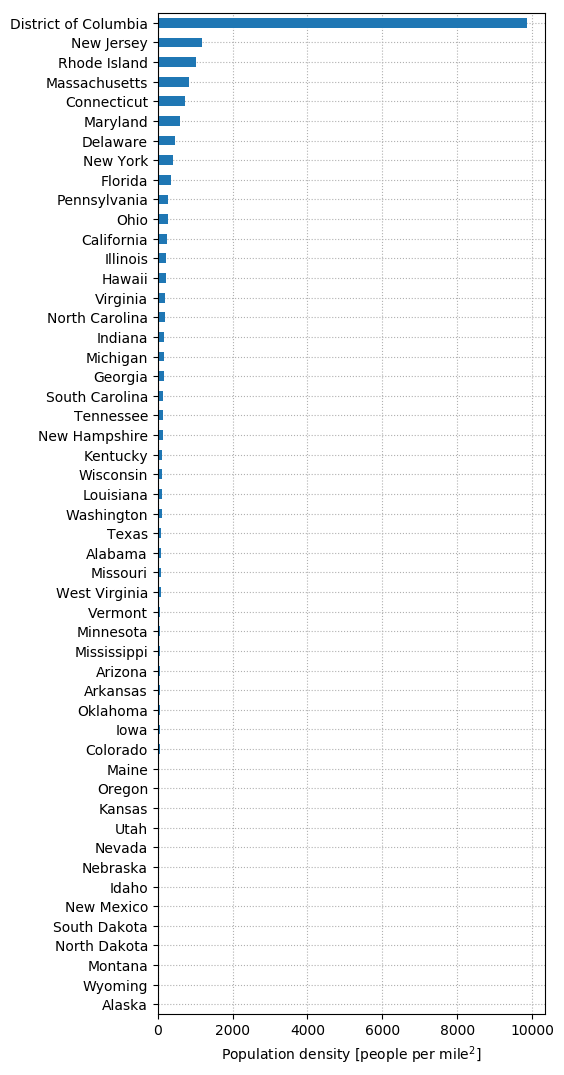

In [8]:
label = 'Population density [people per mile${}^2$]'
pu.plot_ranking(pop_density, score_ax_label=label);

Different ways of plotting:

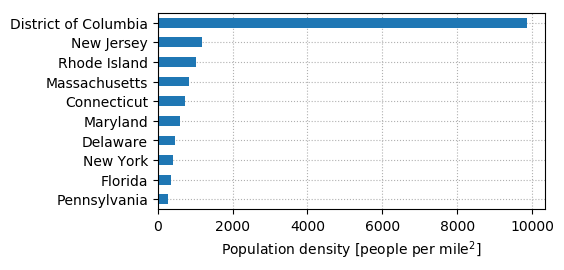

In [9]:
pu.plot_ranking(pop_density, score_ax_label=label, top_n=10);

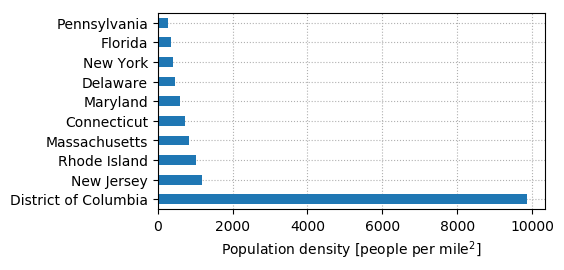

In [10]:
pu.plot_ranking(pop_density, score_ax_label=label, top_n=10, invert_name_ax=True);

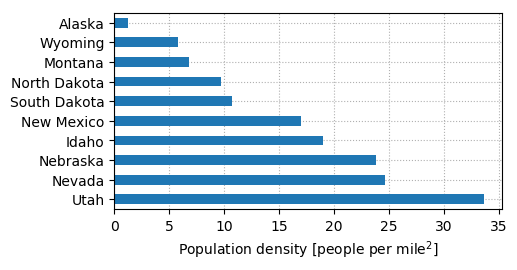

In [11]:
pu.plot_ranking(pop_density, barh=True, score_ax_label=label, top_n=-10);  # 10 states having lowest pop. density

Vertical bars:

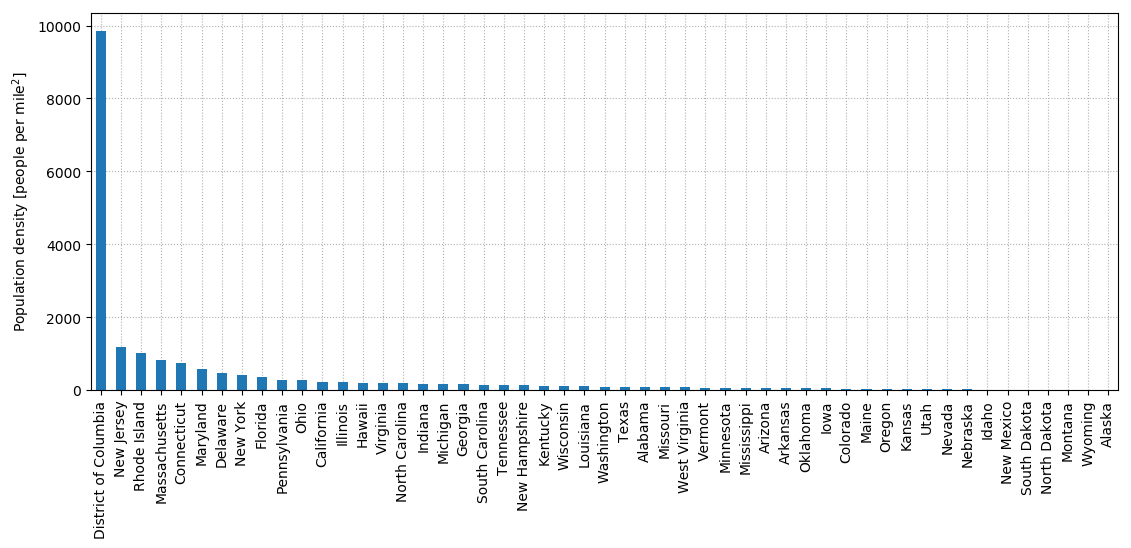

In [12]:
pu.plot_ranking(pop_density, score_ax_label=label, barh=False);

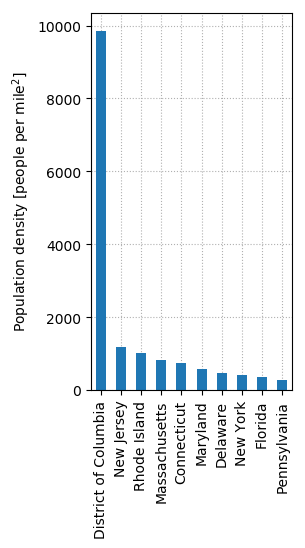

In [13]:
pu.plot_ranking(pop_density, score_ax_label=label, barh=False, top_n=10);

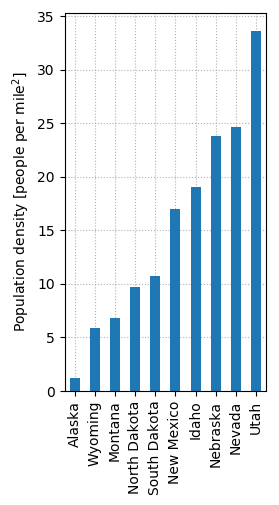

In [14]:
pu.plot_ranking(pop_density, score_ax_label=label, barh=False, top_n=-10);  # 10 states having lowest pop. density

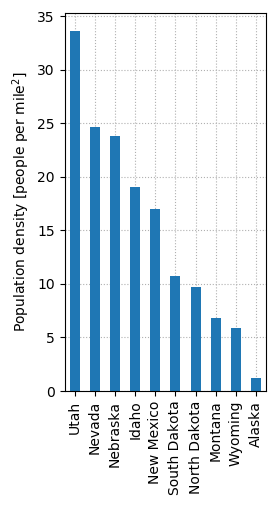

In [15]:
pu.plot_ranking(pop_density, score_ax_label=label, barh=False, top_n=-10, invert_name_ax=True);